In [101]:
import numpy as np
import xarray as xr
from datetime import datetime as dt,timedelta
import matplotlib.pyplot as plt
import netCDF4 as nc


In [208]:
t_init = dt(2017,3,1)
T_INIT = t_init
# climfilebase = 'data_clim/CPC.2p0'
climfilebase = 'data_clim/CPC'
if T_INIT<dt(2021,5,29):
        climoffsetfile = climfilebase+'.1981-2010.nc'
else:
    climoffsetfile = climfilebase+'.1991-2020.nc' 
lead_times = lead_times=(21,28)
varname = 'T2m'

In [209]:
ds = xr.open_dataset(climoffsetfile)

print(ds['T2m'][0].values)

[247.10176 246.84901 245.99535 245.16202 244.98294 244.85123 244.30612
 244.0475  243.09431 242.98015 243.28046 245.29343 246.81853 245.641
 242.22893 251.20773 250.43428 249.29001 248.76822 249.14537 249.30838
 248.39313 248.36647 249.93336 248.79184 246.40387 244.55334 243.63783
 243.42465 241.83272 242.16866 245.58614 245.55609 245.3438  245.68579
 246.06824 248.0961  254.63263 252.61923 251.36967 249.64479 248.90207
 249.38776 247.99985 247.9555  247.97365 246.63779 248.85313 249.32362
 248.49338 247.01974 246.98834 248.12616 249.15846 250.60027 249.72678
 248.55623 247.76292 246.31096 244.80453 243.95901 243.79837 243.23776
 242.5128  241.90134 241.71085 242.93039 244.43066 244.93665 248.3152
 248.22035 248.7222  258.4956  257.6638  255.51529 252.9422  251.4081
 251.87059 253.23875 251.23988 250.90353 248.84378 246.88768 248.35826
 252.21358 249.90411 247.38794 247.7112  248.34111 249.40224 250.1048
 249.26874 248.09222 247.44925 246.54977 245.66394 244.79121 244.69083
 244.56439 

In [105]:
from lib import driver

LIMdriver = driver.Driver(f'namelist_retrospective_8_vars_9_sliding_climo.py')
# read in data
LIMdriver.get_variables(read=True)

ERROR 1: PROJ: proj_create_from_database: Open of /home/ycheng/.conda/envs/cpc/share/proj failed


reading  /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/9_sliding_climo/data_clim/tmp/fullyr_JRA_58-16_sliding_climo_CPCtemp.p
reading  /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/9_sliding_climo/data_clim/tmp/fullyr_JRA_58-16_sliding_climo_SST.p
reading  /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/9_sliding_climo/data_clim/tmp/fullyr_JRA_58-16_sliding_climo_SF750.p
reading  /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/9_sliding_climo/data_clim/tmp/fullyr_JRA_58-16_sliding_climo_SF100.p
reading  /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/9_sliding_climo/data_clim/tmp/fullyr_JRA_58-16_sliding_climo_T2m.p
reading  /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/9_sliding_climo/data_clim/tmp/fullyr_JRA_58-16_sliding_climo_SLP.p
reading  /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/9_sliding_climo/data_clim/tmp/fullyr_JRA_58-16_sliding_climo_H500.p
reading  /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/9_sliding_climo/data_clim/tmp/fullyr_JRA_58-16_sliding_cli

In [149]:
lead_times = (21,28)
days = [int(f'{t_init+timedelta(days = lt):%j}') for lt in lead_times]
print(days)
print(int(f'{t_init:%j}'))

[81, 88]
60


In [110]:
varobj = LIMdriver.use_vars[varname]['data']

# varobj = self.use_vars[varname]['data']
np.asarray(varobj.domain).shape

(2, 696)

In [132]:
fname = f'/Projects/jalbers_process/CPC_LIM/yuan_ming/Data/9_sliding_climo/{t_init.year}/{varname}/{varname}.{t_init.year}.nc'
ds0 = nc.Dataset(fname)
sliding_climo = ds0['climo']
ori_climo = np.mean([varobj.climo[d-1] for d in days],axis=0)
def flatten(a,varobj):
    # Take n-d array and flatten
    b = a[varobj.domain]
    return b
climo = np.array([flatten(i,varobj) for i in sliding_climo])
climo2 = ([varobj.flatten(i) for i in sliding_climo])
np.array([flatten(i,varobj) for i in sliding_climo])
oldclim = np.mean([climo[d-1] for d in days],axis=0)
oldclim2 = np.mean([climo2[d-1] for d in days],axis=0)

In [131]:
print(np.asarray(oldclim).shape)
print(oldclim-oldclim2)

(696,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [120]:
print(np.asarray(ori_climo).shape)

(696,)


In [97]:
ds = xr.open_dataset(climoffsetfile)
days = [int(f'{t_init+timedelta(days = lt):%j}') for lt in lead_times]
try:
    i = days.index(366)
    days[i] = 365
except ValueError:
    pass
try:
    newclim = np.mean([ds[varname].data[d-1] for d in days],axis=0)
except KeyError:
    newclim = np.mean([ds['T2m'].data[d-1] for d in days],axis=0)   
# oldclim = np.mean([varobj.climo[d-1] for d in days],axis=0)

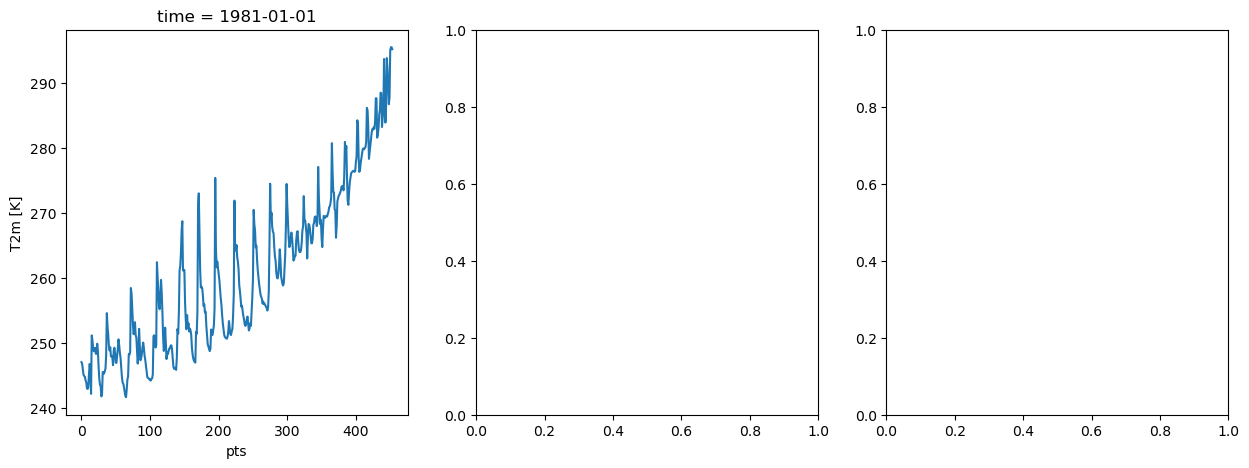

In [99]:
# Create three subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot the first subplot
ds.isel(time=0)['T2m'].plot(ax=axes[0])
# data2.isel(time=0)['T2m'].plot(ax=axes[1])
# diff.plot(ax=axes[2])

In [141]:
import pandas as pd
time = pd.date_range(start=f'1981-01-01',end='1981-12-31')
time


DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '1981-12-22', '1981-12-23', '1981-12-24', '1981-12-25',
               '1981-12-26', '1981-12-27', '1981-12-28', '1981-12-29',
               '1981-12-30', '1981-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [34]:
import numpy as np

class ExampleClass:
    def __init__(self, climo, domain):
        self.climo = climo
        self.domain = domain
    
    def flatten(self, a):
        b = a[self.domain]
        return b

    def process_data(self):
        self.climo = np.array([self.flatten(i) for i in self.climo])

# Example data and domain
climo_data = [
    np.array([[1, 2, 3], [4, 5, 6]]),
    np.array([[7, 8, 9], [10, 11, 12]])
]
print(climo_data)
domain_indices = [0, 1]
# domain_indices = [0, 0]
print(climo_data[0])
print(climo_data[0][0,1])
print(climo_data[1])
print(climo_data[1][0,1])

for i in climo_data:
    print(type(i))
    print((i[domain_indices]))
    
# Create an instance of ExampleClass
example_instance = ExampleClass(climo_data, domain_indices)

# Call the process_data() method
example_instance.process_data()

# Print the updated self.climo attribute
# print(example_instance.climo)



[array([[1, 2, 3],
       [4, 5, 6]]), array([[ 7,  8,  9],
       [10, 11, 12]])]
[[1 2 3]
 [4 5 6]]
2
[[ 7  8  9]
 [10 11 12]]
8
<class 'numpy.ndarray'>
[[1 2 3]
 [4 5 6]]
<class 'numpy.ndarray'>
[[ 7  8  9]
 [10 11 12]]


In [90]:
import numpy as np

# Example latitude and longitude data
ds = {
    'lat': np.array([10, 20, 30, 40, 50, 60]),
    'lon': np.array([-120, -110, -100, -90, -80]),
    'data': np.random.rand(ds['lat'].shape[0],ds['lon'].shape[0])
}

# Example limits for latitude and longitude
lim_S = 15
lim_N = 35
lim_W = -115
lim_E = -85
# Example zmask (a boolean mask)
zmask = np.array([True, False, True, False, True])
# data = np.random.rand(ds['lat'].shape[0],ds['lon'].shape[0])
ds['lon'],ds['lat'] = np.meshgrid(ds['lon'],ds['lat'])

In [91]:
domain = np.where((ds['lat'] >= lim_S) &
                       (ds['lat'] <= lim_N) &
                       (ds['lon'] >= lim_W) &
                       (ds['lon'] <= lim_E) 
                       )


In [92]:
print(domain)

(array([1, 1, 1, 2, 2, 2]), array([1, 2, 3, 1, 2, 3]))


In [93]:
print(ds['lat'][domain])
print(ds['lon'][domain])
print(ds['data'][domain])

[20 20 20 30 30 30]
[-110 -100  -90 -110 -100  -90]
[0.03666822 0.16581389 0.31830566 0.60362576 0.499318   0.37200526]


In [167]:
t_hr = xr.open_dataset("/home/ycheng/LIM/CPC/run_code/data_clim/cpcdata_hr/tavg.2006.nc")
# t = xr.open_dataset("/home/ycheng/LIM/CPC/run_code/data_clim/cpcdata/tavg.2006.nc")
# cpc = xr.open_dataset("/Projects/jalbers_process/CPC_LIM/yuan_ming/Data/cpc_offline_climatology/1981-2010/CPCtemp/CPCtemp.2005.nc")

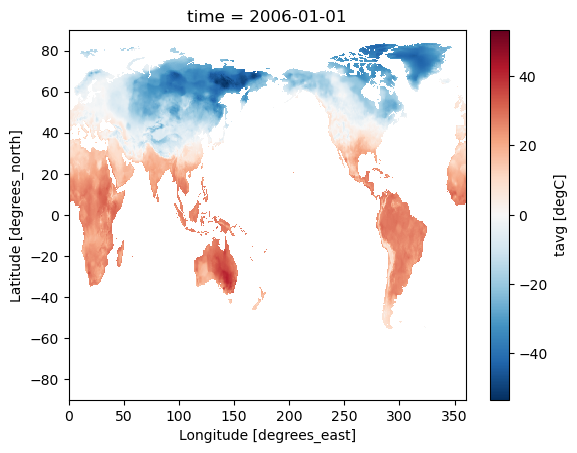

In [224]:
t_hr['tavg'][0].plot()
# plot.show()

In [155]:
t

<xarray.Dataset>
Dimensions:  (time: 365, lat: 23, lon: 50)
Coordinates:
  * time     (time) datetime64[ns] 2006-01-01 2006-01-02 ... 2006-12-31
  * lat      (lat) float64 26.0 28.0 30.0 32.0 34.0 ... 62.0 64.0 66.0 68.0 70.0
  * lon      (lon) float64 194.0 196.0 198.0 200.0 ... 286.0 288.0 290.0 292.0
Data variables:
    temp     (time, lat, lon) float64 ...

In [211]:
t0 = dt(1981,1,1)
t1 = dt(2010,12,31)
t0 = dt(1991,1,1)
t1 = dt(2020,12,31)
t_diff = t1-t0
t_diff.days

10957

10956

In [164]:
coarsegrain = 2
new_lats = np.arange(88,-89,-coarsegrain)


In [165]:
print(new_lats)

[ 88  86  84  82  80  78  76  74  72  70  68  66  64  62  60  58  56  54
  52  50  48  46  44  42  40  38  36  34  32  30  28  26  24  22  20  18
  16  14  12  10   8   6   4   2   0  -2  -4  -6  -8 -10 -12 -14 -16 -18
 -20 -22 -24 -26 -28 -30 -32 -34 -36 -38 -40 -42 -44 -46 -48 -50 -52 -54
 -56 -58 -60 -62 -64 -66 -68 -70 -72 -74 -76 -78 -80 -82 -84 -86 -88]


In [246]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [312]:
LIMdriver = driver.Driver(f'namelist_cpc_offline_climatology.py')
# read in data
LIMdriver.get_variables()
vards = LIMdriver.use_vars['CPCtemp']['data']

reading  /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/cpc_offline_climatology/data_clim/tmp/CPC.1981-2010_CPCtemp.p


In [348]:
ds_yr = xr.open_dataset('/Projects/jalbers_process/CPC_LIM/yuan_ming/Data/cpc_offline_climatology/1981-2010/CPCtemp/CPCtemp.2012.nc')
# print(ds_yr.isel(time=0)['climo'].values)
# ds_yr['climo'][0].plot()

ds_yr_nc = nc.Dataset('/Projects/jalbers_process/CPC_LIM/yuan_ming/Data/cpc_offline_climatology/1981-2010/CPCtemp/CPCtemp.2012.nc')
climo = ds_yr_nc['climo']
# print(ds_yr_nc['climo'][:].data)
def flatten(a):
    # Take n-d array and flatten
    b = a[vards.domain]
    return b
climo = np.array([flatten(i) for i in climo])
# climo[abs(climo)>1e29]=np.nan
# print(climo[0]+273.15)
print(np.where(climo[0]>1e29))
missing_index = np.where(climo[0]>1e29)
# print(climo[0][missing_index])
print(missing_index[0])
print((vards.domain))

print((vards.domain[0][missing_index],vards.domain[1][missing_index]))
# print(vards.domain(np.where(climo[0]>1e29))
missing_values_points = abs(climo)>1e29
print(missing_values_points.sum())
print(climo.shape)



(array([  6, 139, 687]),)
[  6 139 687]
(array([ 7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 

In [335]:

new_lats = np.arange(88,-89,-2)# CPC data 0.25-359.8 and 89.75~-89.75
new_lons = np.arange(2,358,2)
lon_mesh,lat_mesh= np.meshgrid(new_lons,new_lats)

In [357]:
lon_value = lon_mesh[vards.domain[0][missing_index],vards.domain[1][missing_index]]
lat_value = lat_mesh[vards.domain[0][missing_index],vards.domain[1][missing_index]]
print(lon_value)
print(lat_value)
lon_value = lon_mesh[vards.domain[0][:],vards.domain[1][:]]
lat_value = lat_mesh[vards.domain[0][:],vards.domain[1][:]]
# print(lon_value)
# print(lat_value)
# print(lon_mesh)

[270 298 276]
[74 66 22]
[236 238 240 242 262 266 270 304 236 238 242 244 246 248 250 254 260 262
 272 276 278 280 282 284 198 200 202 204 206 208 210 212 214 216 230 232
 244 246 248 250 252 254 256 258 264 266 268 276 278 282 284 286 288 290
 292 196 198 200 202 204 206 208 210 212 214 216 218 220 222 224 226 228
 230 232 234 236 238 240 242 244 254 256 262 266 268 270 276 284 286 288
 290 292 294 194 196 198 200 202 204 206 208 210 212 214 216 218 220 222
 224 226 228 230 232 234 236 238 240 242 244 246 248 250 252 254 256 258
 260 262 264 266 268 270 272 276 286 288 290 292 296 298 200 202 204 206
 208 210 212 214 216 218 220 222 224 226 228 230 232 234 236 238 240 242
 244 246 248 250 252 254 256 258 260 262 264 266 268 270 274 276 278 282
 288 290 292 294 196 198 200 202 204 206 208 210 212 214 216 218 220 222
 224 226 228 230 232 234 236 238 240 242 244 246 248 250 252 254 256 258
 260 262 264 266 280 282 284 286 194 196 198 200 202 204 206 210 220 222
 224 226 228 230 232 234 2

In [282]:
import netCDF4 as nc
fname = f'/Projects/jalbers_process/CPC_LIM/yuan_ming/Data/9_sliding_climo/2017/{varname}/{varname}.2017.nc'
ds0 = nc.Dataset(fname)
print(f'add offset...using climo from {fname}')
sliding_climo = ds0['climo']
# def flatten(a,varobj):
#     # Take n-d array and flatten
#     b = a[varobj.domain]
#     return b
climo2 = np.array([varobj.flatten(i) for i in sliding_climo])
# climo = np.array([flatten(i,varobj) for i in sliding_climo])
# oldclim = np.mean([climo[d-1] for d in days],axis=0) 
print(climo2.shape)
print(climo2[0])

add offset...using climo from /Projects/jalbers_process/CPC_LIM/yuan_ming/Data/9_sliding_climo/2017/T2m/T2m.2017.nc
(365, 696)
[244.90234 244.30283 244.18217 244.06091 243.35411 242.95435 244.14412
 256.81537 245.36308 244.94226 244.83748 244.3365  244.15784 243.90474
 243.7528  243.33322 243.18509 243.11107 243.57019 244.48164 244.98357
 245.99472 245.72336 246.01913 249.24107 248.92844 248.61415 248.54845
 248.65585 248.89792 249.30441 250.19505 250.90591 250.91441 247.5787
 247.3028  245.23816 244.7376  244.42142 244.17075 243.87057 243.52887
 243.44757 243.57832 243.06349 242.8986  243.61874 244.53224 245.61974
 247.4588  247.78026 247.47357 247.42282 247.8682  249.27707 253.0086
 252.9234  252.08316 252.5086  252.45444 251.865   252.1475  252.23576
 252.31497 252.56859 252.34071 251.85594 251.38983 250.94456 250.44412
 250.1721  249.4285  249.06062 248.59525 248.06387 247.78217 247.41432
 247.26482 247.19063 246.77438 244.47375 244.18018 243.34355 243.06427
 242.87344 243.26709 24

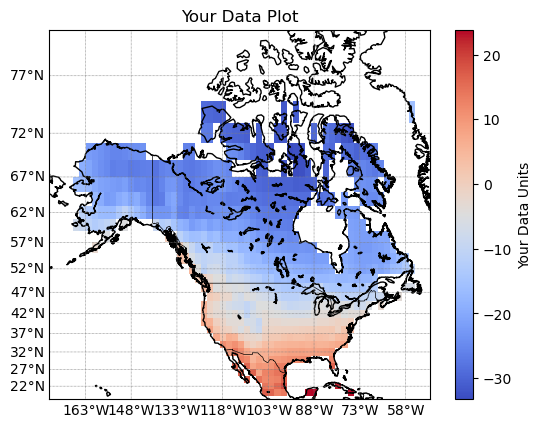

[[[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  ...
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]]

 [[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  ...
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]]

 [[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  ...
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]]

 ...

 [[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  ...
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]]

 [[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  ...
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]]

 [[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  ...
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]]]


In [361]:
# Replace 'latitude', 'longitude', and 'variable_name' with your actual variable names

latitudes = ds_yr_nc.variables['lat'][:]
longitudes = ds_yr_nc.variables['lon'][:]
data = ds_yr_nc.variables['climo'][:]
# Create a Basemap instance with the desired map projection and other settings
m = Basemap(projection='merc', llcrnrlat=18, urcrnrlat=80,
            llcrnrlon=185, urcrnrlon=310, resolution='l')
import numpy as np

# Assuming latitudes and longitudes are 1D arrays
lon_mesh, lat_mesh = np.meshgrid(longitudes, latitudes)


x, y = m(lon_mesh, lat_mesh)
# Replace 'cmap' with the desired colormap
m.pcolormesh(x, y, data[0], cmap='coolwarm', shading='auto')

# Add coastlines, countries, and color bar
m.drawcoastlines()
m.drawcountries()
plt.colorbar(label='Your Data Units')

# Draw parallels (latitude lines) and meridians (longitude lines)
parallels = np.arange(min(latitudes), max(latitudes), 5.0)  # Define the spacing of parallels
meridians = np.arange(min(longitudes), max(longitudes), 15.0)  # Define the spacing of meridians

# Draw latitude lines
m.drawparallels(parallels, labels=[True, False, False, False], linewidth=0.5, color='gray')

# Draw longitude lines
m.drawmeridians(meridians, labels=[False, False, False, True], linewidth=0.5, color='gray')


# Add title and show the plot
plt.title('Your Data Plot')
plt.show()
print(data)

In [363]:
ds_climo = xr.open_dataset('/home/ycheng/LIM/CPC/run_code/data_clim/CPC.2p0.1981-2010.test.nc')

In [364]:
# ds_climo.isel(time=0)['T2m'].plot()
print(ds_climo.isel(time=0)['T2m'].values)

[244.02036 243.43997 243.15688 242.37943 241.20898 241.90105 249.49084
 257.08066 246.13435 246.02417 244.30542 243.45923 243.1587  242.85558
 242.40352 242.17572 241.14685 241.46844 243.51382 245.75021 244.25085
 243.05157 241.35762 240.53769 250.851   250.28244 249.43578 248.50783
 247.54416 247.52382 248.11597 248.7712  248.83514 249.6342  247.04874
 246.99448 248.901   248.6177  247.23593 245.10226 243.44388 242.34056
 242.1652  241.59749 239.86888 240.53964 240.38237 244.34732 243.73834
 244.47719 244.19354 242.86995 244.73468 243.99397 247.02728 254.04341
 252.51668 250.53067 249.23134 248.29504 246.62045 247.09297 247.09935
 246.03091 246.14906 246.78374 246.81389 245.11285 247.1461  247.76843
 247.48218 247.0446  246.02019 245.7408  246.49982 247.17935 248.03807
 249.14307 248.79074 247.68951 242.85454 242.20323 241.07089 239.92633
 240.41006 242.10599 243.20132 246.7771  246.84181 247.61986 246.70076
 245.78105 247.82506 257.29138 256.69666 255.87634 253.5707  252.11264
 251.4

In [362]:
import numpy as np

# Create a 1D array with NaN values
data = np.array([1.0, 2.0, np.nan, 4.0, np.nan, 6.0, 7.0, np.nan, 9.0])

# Find indices of NaN values
nan_indices = np.isnan(data)

# Create an array of non-NaN indices
non_nan_indices = np.arange(len(data))[~nan_indices]

# Interpolate NaN values using adjacent points
data[nan_indices] = np.interp(np.where(nan_indices)[0], non_nan_indices, data[non_nan_indices])

# Print the filled array
print(data)


[1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [367]:
ds1 = xr.open_dataset('data_clim/CPC.1991-2020.nc')
ds1

/home/ycheng/.conda/envs/cpc/lib/python3.10/site-packages/xarray/coding/times.py:710: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/ycheng/.conda/envs/cpc/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


<xarray.Dataset>
Dimensions:  (time: 365, pts: 454)
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 0001-12-31 00:00:00
Dimensions without coordinates: pts
Data variables:
    lon      (pts) float32 ...
    lat      (pts) float32 ...
    T2m      (time, pts) float64 ...

In [368]:
ds2017 = xr.open_dataset('/data/ycheng/JRA/Data/2017/hgt_2017_1p25.nc')

In [371]:
ds2017['longitude']

<xarray.DataArray 'longitude' (longitude: 288)>
array([  0.  ,   1.25,   2.5 , ..., 356.25, 357.5 , 358.75])
Coordinates:
    number     int64 ...
    step       timedelta64[ns] ...
  * longitude  (longitude) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8